# Midterm Exam Prompt

Your IT department has been struggling with an onslaught of malware of different types for the past several months, painstakingly grouped into a few types. Now, one of their data centers has gone down, and they believe it's due to the same malware. But it takes weeks to sort out what kind they've been hit with. The CIO heard that you took DATA 602 and asked for your help. You've been given a dataset of the features the CERT has developed so far, and the associated malware family IDs. 

The CIO has the following goals for you:
1. Can you develop a classifier based on this data, and will it be able to give us an accurate estimate of which malware family has just taken down our datacenter? 
2. What can you tell the CIO about what has already been found and processed by the CERT? All of the feature creation and labeling is expensive! 

Like many real world projects, you've been thrown into this with no documentation, and no information about the data or its quality. You've meet two people from the CERT doing this work. One was pretty sharp, and the other seemed like their dad must have gotten them the job... worse, the person who developed the features quit last week. 

For this exam, it is intentionally free form. Simply building a model won't be sufficient. You need to have a report (i.e., this notebook!) for the CIO on what you've done, why you think it will work, the weakness & strengths of what you've done. This exam is intentionally vague and open ended.

You can download the exam csv [here](https://www.dropbox.com/s/skrdvxl9xt58ucm/data602_exam.csv?dl=0). 



In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
#You may find useful to do this on your own local computer to iterate faster,
#but make sure you can transfer your notebook online and that it works when done! 

data = pd.read_csv('data602_exam.csv')

In [3]:
data.head()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
0,3.0,3.0,689.0,18.000000,6.0,890.0,6.000000,39.0,17.000000,88.0,...,-208196.847822,149454.443336,330552.774213,133907.410063,44038.800343,55156.067737,-77588.974897,171979.000000,162674.0,2
1,3.0,3.0,583.0,15.000000,5.0,1574.0,8640.382774,6.0,7.000000,30.0,...,36209.864030,221318.549792,-1568.194718,22651.037591,-144906.975987,-33489.566102,157701.356695,7702.000000,6551.0,8
2,3.0,4.0,2796.0,15.000000,5.0,625.0,5.000000,58.0,11.000000,152.0,...,88398.670923,66550.556919,5404.362294,13947.925003,-48559.885445,257023.562444,-204889.973046,151324.169975,12946.0,6
3,3.0,3.0,373.0,2726.071722,9.0,615.0,9.000000,16.0,98583.277889,34.0,...,-157101.258148,-60336.395075,157629.928962,117458.409503,62076.273381,98733.489947,-51461.636374,122247.000000,98621.0,4
4,3.0,3.0,77.0,12.000000,4.0,66.0,91945.635853,3.0,0.000000,5.0,...,32595.648968,-228909.737896,-87033.363460,131606.196188,-118625.690367,89326.297602,-84991.427204,15501.000000,11864.0,1


In [4]:
data.tail()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
4994,4.0,4.0,118.0,0.0,3.0,0.0,0.0,7.0,0.0,19.000000,...,-73364.892264,56908.607312,17895.279817,-4589.198675,103618.354421,-126164.290238,-24272.971224,7100.0,6002.0,4
4995,3.0,3.0,27.0,12.0,4.0,38.0,4.0,3.0,0.0,84772.903087,...,-91323.369562,101628.992660,8812.429736,-41149.748369,-56293.578460,87524.257112,-200433.940978,69304.0,65638.0,3
4996,3.0,3.0,16.0,12.0,4.0,7.0,4.0,9.0,0.0,16.000000,...,26135.603443,172273.939349,74515.593674,79555.659907,79230.809864,92047.004360,94829.356066,71789.0,68354.0,3
4997,4.0,4.0,2810.0,0.0,2.0,666.0,0.0,14.0,9.0,26.000000,...,-70335.106256,-21680.148668,11900.591113,8015.793354,-105036.351181,-33386.286236,169699.674511,89989.0,70139.0,2
4998,3.0,4.0,1587.0,21.0,7.0,526.0,7.0,34.0,5.0,61033.550970,...,-14702.601507,18593.024103,2249.256720,45713.524900,-16239.518388,-78553.054374,-115903.637264,9394.0,3145.0,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Columns: 1805 entries, Virtual to target
dtypes: float64(1804), int64(1)
memory usage: 68.8 MB


In [6]:
data.select_dtypes(include='int64').columns

Index(['target'], dtype='object')

In [7]:
data.describe()

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,target
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2413.316145,2659.311487,4424.891220,2291.214822,2512.272757,3470.164710,2612.176503,2472.228927,2554.660865,2452.442360,...,14331.213118,9358.953517,23654.548237,8540.786955,17432.020184,22032.274639,9505.453675,70574.781259,54803.742148,4.086817
std,12506.374487,13159.966494,13604.624599,11996.827931,12656.467627,12442.838259,13026.935701,12695.076990,12533.327183,12280.398873,...,108685.996366,107161.612891,109735.456647,105281.088434,107423.247504,109858.578170,106876.987983,67871.038272,53395.251409,2.677785
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-399471.378431,-344924.897141,-348906.065760,-379757.698729,-345576.170139,-410986.193796,-355679.953652,0.000000,0.000000,1.000000
25%,3.000000,3.000000,77.000000,6.000000,4.000000,37.000000,2.000000,6.000000,0.000000,13.000000,...,-57945.624535,-63567.620933,-50475.672159,-63194.878910,-55114.830841,-50016.264131,-63550.766114,13387.000000,8117.000000,2.000000
50%,3.000000,3.000000,526.000000,12.000000,4.000000,407.000000,4.000000,12.000000,5.000000,20.000000,...,13494.353190,9797.650967,22385.687582,10410.067259,18424.422329,21454.161075,9709.062906,67890.000000,49865.000000,3.000000
75%,4.000000,4.000000,1977.500000,18.000000,7.000000,1330.500000,6.000000,18.000000,9.000000,38.000000,...,87246.586847,82454.969088,95044.827729,80084.458079,87543.264657,96288.509357,82107.827536,88771.000000,68589.500000,6.000000
max,99416.349008,99973.742656,107775.000000,99364.479576,99838.164777,100278.830725,99673.225000,100002.864718,99039.014532,99262.954988,...,500390.536696,358149.487611,465889.867881,364890.436486,389119.972128,443685.869973,437127.690431,412076.355373,300241.000000,9.000000


In [8]:
data.isnull().sum()

Virtual    0
Offset     0
loc        0
Import     0
Imports    0
          ..
Img104     0
Img105     0
Img106     0
Img107     0
target     0
Length: 1805, dtype: int64

In [9]:
data=data.dropna()

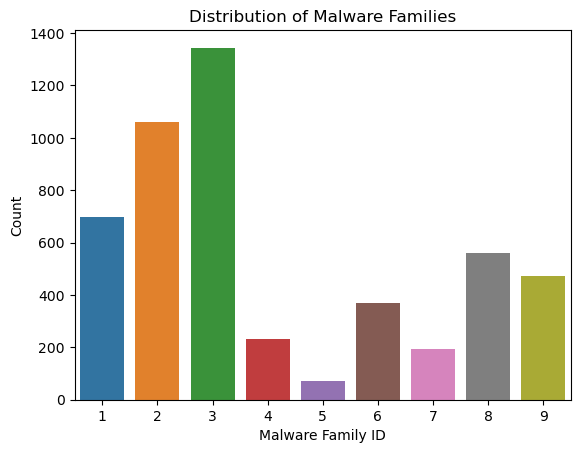

In [10]:
#the distribution of the target variable
sns.countplot(x='target', data=data)
plt.title('Distribution of Malware Families')
plt.xlabel('Malware Family ID')
plt.ylabel('Count')
plt.show()

#### According to the bar graph we can say that the malware family 3 attacks are more when compared to the other malwares.

# Machine Learning Models for the Data

In [11]:
# Splitting the Data to train and test

from sklearn.model_selection import train_test_split

x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [12]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_classifier = DecisionTreeClassifier()


tree_classifier.fit(x_train, y_train)

num_nodes = tree_classifier.tree_.node_count
tree_depth = tree_classifier.tree_.max_depth

print("Number of nodes in the decision tree:", num_nodes)
print("Depth of the decision tree:", tree_depth)

train_predictions = tree_classifier.predict(x_train)
test_predictions = tree_classifier.predict(x_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train data prediction accuracy:", train_accuracy)
print("Test data prediction accuracy:", test_accuracy)


Number of nodes in the decision tree: 655
Depth of the decision tree: 38
Train data prediction accuracy: 1.0
Test data prediction accuracy: 0.7987878787878788


#### We can further improve the above model by introducing the gridsearchcv because above model seems to be overfitting.

In [13]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

y_pred_train=model.predict(x_train)
y_pred_test = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Train Data Model Accuracy:", accuracy_train)
print("Test Data Model Accuracy:", accuracy_test)

Train Data Model Accuracy: 1.0
Test Data Model Accuracy: 0.9072727272727272


### Eventhough the Train data Accuracy is 100 when is not good for the model, but the test data accuracy is close enough to be good.

In [14]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
top_10_features = feature_importances.nlargest(10)
print("Top 10 Important Features:")
print(top_10_features)

Top 10 Important Features:
TB_9e                   0.010337
TB_97                   0.008442
TB_a4                   0.008206
section_names_header    0.008019
ExitProcess             0.007804
.rsrc_por               0.007505
TB_98                   0.006551
ent_p_5                 0.006491
ent_p_6                 0.006472
TB_7b                   0.006415
dtype: float64


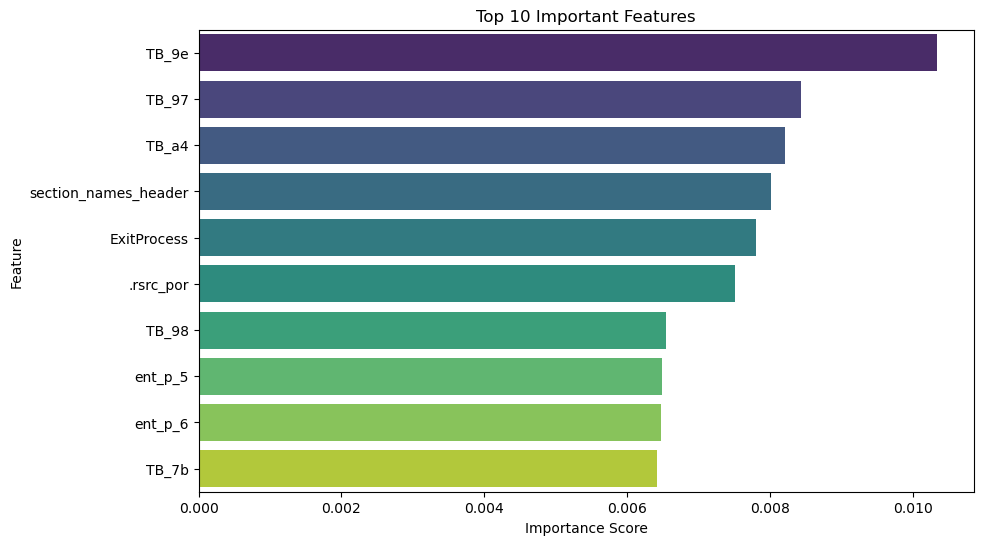

In [15]:
feature_names = ["TB_9e", "TB_97", "TB_a4", "section_names_header", "ExitProcess", ".rsrc_por", "TB_98", "ent_p_5", "ent_p_6", "TB_7b"]
importance_scores = [0.010337, 0.008442, 0.008206, 0.008019, 0.007804, 0.007505, 0.006551, 0.006491, 0.006472, 0.006415]

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [16]:
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
top_10_least=feature_importances.nsmallest(10)
print(top_10_least)

GetFileTitleA           0.000000e+00
FreeResource            0.000000e+00
GetKeyboardType         0.000000e+00
OpenServiceA            0.000000e+00
__vbaAryLock            0.000000e+00
GetEnhMetaFileBits      0.000000e+00
string_len_counts_87    0.000000e+00
socket                  6.764067e-07
__vbaStrToUnicode       1.327969e-06
IntersectClipRect       2.103422e-06
dtype: float64


In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

report = classification_report(y_test, y_pred)

print("Logistic Regression Classification Report:")

print(report)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.73      0.69       230
           2       0.48      0.83      0.61       371
           3       0.57      0.98      0.72       440
           4       0.00      0.00      0.00        73
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00       122
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00       185
           9       0.00      0.00      0.00       159

    accuracy                           0.55      1650
   macro avg       0.19      0.28      0.22      1650
weighted avg       0.35      0.55      0.43      1650



C:\Users\akken\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akken\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [18]:

# Ridge Logistic Regression
ridge_logreg = LogisticRegression(penalty='l2', random_state=42)
ridge_logreg.fit(x_train, y_train)

y_pred_ridge_train = ridge_logreg.predict(x_train)
y_pred_ridge_test = ridge_logreg.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_ridge_train)
accuracy_test = accuracy_score(y_test, y_pred_ridge_test)

print("Train Data Model Accuracy:", accuracy_train)
print("Test Data Model Accuracy:", accuracy_test)


# Lasso Logistic Regression
lasso_logreg = LogisticRegression(penalty='l1', random_state=42, solver='liblinear')  # Specify solver for L1 penalty
lasso_logreg.fit(x_train, y_train)

y_pred_lasso_train = lasso_logreg.predict(x_train)
y_pred_lasso_test = lasso_logreg.predict(x_test)

accuracy_train = accuracy_score(y_train, y_pred_lasso_train)
accuracy_test = accuracy_score(y_test, y_pred_lasso_test)

print("Train Data Model Accuracy:", accuracy_train)
print("Test Data Model Accuracy:", accuracy_test)

C:\Users\akken\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Data Model Accuracy: 0.5476261570618095
Test Data Model Accuracy: 0.5496969696969697
Train Data Model Accuracy: 1.0
Test Data Model Accuracy: 0.5066666666666667


Based on the results, the Random Forest Classifier stands out as the best-performing model with the highest accuracy of around 90.73% on the test data. It demonstrates good generalization ability and robustness to new, unseen data.

The Decision Tree Classifier also performed well on the test data but might require pruning or depth limitation to avoid overfitting.

The Logistic Regression model, Ridge Regression, and Lasso Regression showed varied performance, with the Logistic Regression model performing moderately, while Ridge and Lasso Regression models struggled to achieve high accuracy on the test data.

To further improve the models, hyperparameter tuning, feature engineering, and cross-validation should be considered. Additionally, addressing potential data imbalances or data quality issues may lead to more reliable and accurate predictions.